In [1]:
# 6.1.4 Generate Random Latitudes and Longitudes
    # Create Latitude and Longitude Combinations

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Unpack lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [7]:
#6.2.6: Get the City Weather Data

import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#create an empty list to hold the weather data.
city_data=[]
# Print the begining of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#create counters
record_count=1
set_count=1

# In the code block, we have initialized the counters at 1 because we want the first iteration of the logging... 
# for each recorded response and the set to start at 1.

Beginning Data Retrieval
------------------------


In [10]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
       # set_count += 1
        #record_count = 1
    # Create endpoint URL with each city.
        #city_url = url + "&q=" + cities[i]
       # city_url

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | san policarpo
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | nandi
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | mamallapuram
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | ust-tsilma
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | wageningen
Processing Record 17 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 18 of Set 1 | ngama
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | constitucion
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | douglas
Proce

Processing Record 44 of Set 4 | aban
Processing Record 45 of Set 4 | bardiyah
Processing Record 46 of Set 4 | togur
Processing Record 47 of Set 4 | jennings
Processing Record 48 of Set 4 | dudinka
Processing Record 49 of Set 4 | suntar
Processing Record 50 of Set 4 | chapais
Processing Record 1 of Set 5 | touros
Processing Record 2 of Set 5 | gushi
Processing Record 3 of Set 5 | sinjar
Processing Record 4 of Set 5 | shymkent
Processing Record 5 of Set 5 | sisimiut
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | saleaula
City not found. Skipping...
Processing Record 8 of Set 5 | vila franca do campo
Processing Record 9 of Set 5 | watertown
Processing Record 10 of Set 5 | aklavik
Processing Record 11 of Set 5 | mabaruma
Processing Record 12 of Set 5 | sao joao da barra
Processing Record 13 of Set 5 | puerto escondido
Processing Record 14 of Set 5 | sharlyk
Processing Record 15 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 5 | linguere

Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | pochutla
Processing Record 35 of Set 8 | lusambo
Processing Record 36 of Set 8 | cheney
Processing Record 37 of Set 8 | bud
Processing Record 38 of Set 8 | matay
Processing Record 39 of Set 8 | stawell
Processing Record 40 of Set 8 | amderma
City not found. Skipping...
Processing Record 41 of Set 8 | yerbogachen
Processing Record 42 of Set 8 | granada
Processing Record 43 of Set 8 | sankt florian
Processing Record 44 of Set 8 | solnechnyy
Processing Record 45 of Set 8 | abu kamal
Processing Record 46 of Set 8 | lagoa
Processing Record 47 of Set 8 | kotido
Processing Record 48 of Set 8 | azimur
City not found. Skipping...
Processing Record 49 of Set 8 | misratah
Processing Record 50 of Set 8 | dubbo
Processing Record 1 of Set 9 | nishihara
Processing Record 2 of Set 9 | raudeberg
Processing Record 3 of Set 9 | broome
Processing Record 4 of Set 9 | louisbourg
City not found. Skipping...
Processing Record 5 of Set 9 

Processing Record 17 of Set 12 | karamea
City not found. Skipping...
Processing Record 18 of Set 12 | kyren
Processing Record 19 of Set 12 | caarapo
Processing Record 20 of Set 12 | zyryanka
Processing Record 21 of Set 12 | tocopilla
Processing Record 22 of Set 12 | pangoa
Processing Record 23 of Set 12 | north myrtle beach
Processing Record 24 of Set 12 | krasnoselkup
Processing Record 25 of Set 12 | saquarema
Processing Record 26 of Set 12 | moron
Processing Record 27 of Set 12 | stroud
Processing Record 28 of Set 12 | stephenville
Processing Record 29 of Set 12 | ankazoabo
Processing Record 30 of Set 12 | conakry
Processing Record 31 of Set 12 | sao tome
Processing Record 32 of Set 12 | hornepayne
Processing Record 33 of Set 12 | arlit
Processing Record 34 of Set 12 | bilma
Processing Record 35 of Set 12 | senno
Processing Record 36 of Set 12 | barentu
Processing Record 37 of Set 12 | kendari
Processing Record 38 of Set 12 | luang prabang
Processing Record 39 of Set 12 | kirakira
Pr

In [12]:
# 6.2.7: Create a DataFrame of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Policarpo,12.1791,125.5072,80.76,82,100,6.22,PH,2021-07-19 23:08:36
1,Dikson,73.5069,80.5464,39.45,78,0,7.11,RU,2021-07-19 23:08:36
2,Nandi,13.3855,77.6984,67.60,89,92,13.91,IN,2021-07-19 23:08:36
3,Leningradskiy,69.3833,178.4167,40.96,85,100,3.65,RU,2021-07-19 23:08:37
4,Mataura,-46.1927,168.8643,40.48,79,67,3.22,NZ,2021-07-19 23:08:37
5,Cherskiy,68.7500,161.3000,59.07,44,100,9.33,RU,2021-07-19 23:08:37
6,Mamallapuram,12.6264,80.1722,78.85,67,98,14.27,IN,2021-07-19 23:08:37
7,Saint-Philippe,-21.3585,55.7679,69.39,75,50,14.72,RE,2021-07-19 23:08:38
8,Ust-Tsilma,65.4410,52.1498,53.78,98,100,6.04,RU,2021-07-19 23:08:38
9,Khatanga,71.9667,102.5000,56.97,64,100,6.98,RU,2021-07-19 23:08:38


In [14]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Policarpo,PH,2021-07-19 23:08:36,12.1791,125.5072,80.76,82,100,6.22
1,Dikson,RU,2021-07-19 23:08:36,73.5069,80.5464,39.45,78,0,7.11
2,Nandi,IN,2021-07-19 23:08:36,13.3855,77.6984,67.60,89,92,13.91
3,Leningradskiy,RU,2021-07-19 23:08:37,69.3833,178.4167,40.96,85,100,3.65
4,Mataura,NZ,2021-07-19 23:08:37,-46.1927,168.8643,40.48,79,67,3.22
...,...,...,...,...,...,...,...,...,...
581,Norfolk,US,2021-07-19 23:11:07,42.1668,-71.2495,74.89,88,75,0.00
582,Charters Towers,AU,2021-07-19 23:11:07,-20.1000,146.2667,63.72,35,15,9.73
583,Santiago Del Estero,AR,2021-07-19 23:07:53,-27.7951,-64.2615,55.92,28,0,7.05
584,Saint-Joseph,RE,2021-07-19 23:11:07,-21.3667,55.6167,68.38,74,25,15.41


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# 6.3.1: Plot Latitude vs. Temperature (Scatter Plot)

In [ ]:
# Get Data for Plotting

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

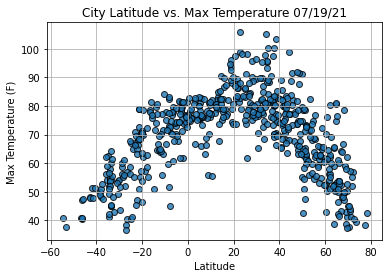

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [19]:
# 6.3.2: Plot Latitude vs. Humidity

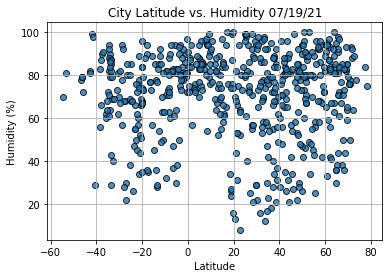

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [21]:
# 6.3.3: Plot Latitude vs. Cloudiness

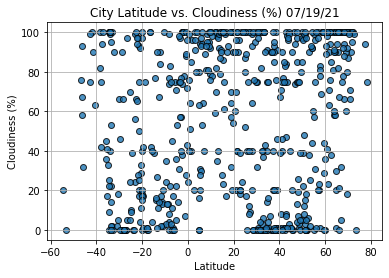

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [23]:
# 6.3.4: Plot Latitude vs. Wind Speed

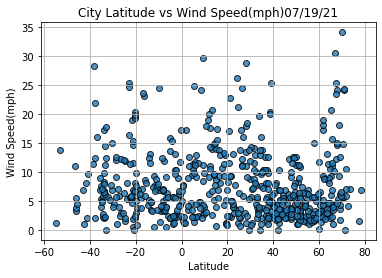

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed(mph)" + time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/fig4.png")
#show plot.
plt.show()

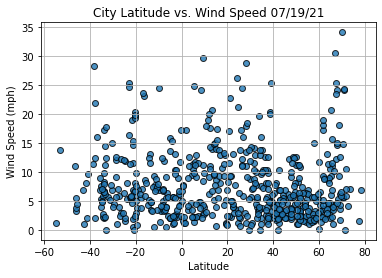

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()